### Lab 4

#### Section: 1-2pm
#### Group: 3

#### Name: Jongho Yoo
#### UT EID: jy23294

#### Name: Sam Song
#### UT EID: sks3858

#### Name: CJ Yun
#### UT EID: cy7233

#### Date: Sep 29, 2023

In [1]:
# import libraries
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib as plt

In [2]:
# import dataframe
df = pd.read_csv('cars_clean.csv')

#### Sanity Checks

In [3]:
df.size

5427

In [4]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [5]:
df.tail()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
196,196,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,198,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470
200,200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   symboling          201 non-null    int64  
 2   normalized-losses  201 non-null    int64  
 3   make               201 non-null    object 
 4   fuel-type          201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

In [7]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,58.167861,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,0.000000,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,50.000000,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,100.000000,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,150.000000,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,200.000000,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


#### Run a correlation test between all numeric values

In [8]:
df.corr(numeric_only = True)

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.162490,0.144301,-0.022474,-0.195662,0.027956,0.020344,-0.118214
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155


#### Q1. Check only the correlation coefficient with respect to the price

In [9]:
abs(df.corr(numeric_only=True)['price']).sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.809575
width                0.751265
highway-mpg          0.704692
length               0.690628
city-mpg             0.686571
wheel-base           0.584642
bore                 0.543155
height               0.135486
normalized-losses    0.133999
Unnamed: 0           0.118214
peak-rpm             0.101616
symboling            0.082391
stroke               0.082269
compression-ratio    0.071107
Name: price, dtype: float64

#### Q2. Pearson correlation coefficient and p-value for the top six parameters with price

In [10]:
es_pearson_coeff, es_p_value = stats.pearsonr(df['engine-size'], df['price'])
cw_pearson_coeff, cw_p_value = stats.pearsonr(df['curb-weight'], df['price'])
h_pearson_coeff, h_p_value = stats.pearsonr(df['horsepower'], df['price'])
w_pearson_coeff, w_p_value = stats.pearsonr(df['width'], df['price'])
hmpg_pearson_coeff, hmpg_p_value = stats.pearsonr(df['highway-mpg'], df['price'])
l_pearson_coeff, l_p_value = stats.pearsonr(df['length'], df['price'])

print("Engine-size: ", "Correlation coefficient =", es_pearson_coeff, " p-value =" , es_p_value)
print("Curb-Weight: ", "Correlation coefficient =", cw_pearson_coeff, " p-value =" , cw_p_value)
print("Horsepower:  ", "Correlation coefficient =", h_pearson_coeff, " p-value =" , h_p_value)
print("Width:       ", "Correlation coefficient =", w_pearson_coeff, " p-value =" , w_p_value)
print("Highway-mpg: ", "Correlation coefficient =", hmpg_pearson_coeff, " p-value =" , hmpg_p_value)
print("Length:      ", "Correlation coefficient =", l_pearson_coeff, " p-value =" , l_p_value)


Engine-size:  Correlation coefficient = 0.8723351674455186  p-value = 9.26549162219736e-64
Curb-Weight:  Correlation coefficient = 0.834414525770285  p-value = 2.189577238893392e-53
Horsepower:   Correlation coefficient = 0.8095745670036555  p-value = 6.369057428260921e-48
Width:        Correlation coefficient = 0.751265344052268  p-value = 9.200335510479168e-38
Highway-mpg:  Correlation coefficient = -0.7046922650589533  p-value = 1.7495471144474797e-31
Length:       Correlation coefficient = 0.6906283804483644  p-value = 8.016477466158386e-30


#### Q3. Use seaborn to give a visual linear regression plot of those six parameters with price

<Axes: xlabel='length', ylabel='price'>

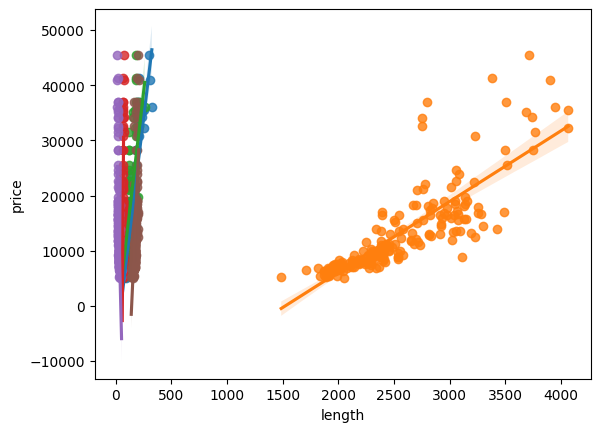

In [11]:
sns.regplot(x = 'engine-size', y = 'price', data = df)
sns.regplot(x = 'curb-weight', y = 'price', data = df)
sns.regplot(x = 'horsepower', y = 'price', data = df)
sns.regplot(x = 'width', y = 'price', data = df)
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
sns.regplot(x = 'length', y = 'price', data = df)

#### Q4. Get the slope and intercept for each these six parameters against price

In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [13]:
# engine-size and price
X = df[['engine-size']]
Y = df['price']
lm.fit(X, Y)
es_intercept, es_coef, es_r_squared, es_Yhat = lm.intercept_, lm.coef_, lm.score(X, Y), lm.predict(X)

# curb-weight and price
X = df[['curb-weight']]
Y = df['price']
lm.fit(X, Y)
cw_intercept, cw_coef, cw_r_squared, cw_Yhat = lm.intercept_, lm.coef_, lm.score(X, Y), lm.predict(X)

# horsepower and price
X = df[['horsepower']]
Y = df['price']
lm.fit(X, Y)
h_intercept, h_coef, h_r_squared, h_Yhat = lm.intercept_, lm.coef_, lm.score(X, Y), lm.predict(X)

# width and price
X = df[['width']]
Y = df['price']
lm.fit(X, Y)
w_intercept, w_coef, w_r_squared, w_Yhat = lm.intercept_, lm.coef_, lm.score(X, Y), lm.predict(X)

# highway-mpg and price
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X, Y)
hmpg_intercept, hmpg_coef, hmpg_r_squared, hmpg_Yhat = lm.intercept_, lm.coef_, lm.score(X, Y), lm.predict(X)

# length and price
X = df[['length']]
Y = df['price']
lm.fit(X, Y)
l_intercept, l_coef, l_r_squared, l_Yhat = lm.intercept_, lm.coef_, lm.score(X, Y), lm.predict(X)

In [14]:
es_intercept, es_coef, es_r_squared

(-7963.338906281046, array([166.86001569]), 0.7609686443622008)

In [15]:
cw_intercept, cw_coef, cw_r_squared

(-19553.570636227483, array([12.818847]), 0.6962476008164488)

In [16]:
h_intercept, h_coef, h_r_squared

(-4597.558297892891, array([172.18312191]), 0.6554109795391572)

In [17]:
w_intercept, w_coef, w_r_squared

(-173986.0872823373, array([2841.03660939]), 0.5643996171739717)

In [18]:
hmpg_intercept, hmpg_coef, hmpg_r_squared

(38423.305858157415, array([-821.73337832]), 0.4965911884339175)

In [19]:
l_intercept, l_coef, l_r_squared 

(-64384.43632742169, array([445.41402114]), 0.47696755988073036)

#### Q5. Predicted values and residuals

In [20]:
# output the prediction
es_residual = df['price'] - es_Yhat
cw_residual = df['price'] - cw_Yhat
h_residual = df['price'] - h_Yhat
w_residual = df['price'] - w_Yhat
hmpg_residual = df['price'] - hmpg_Yhat
l_residual = df['price'] - l_Yhat

<Axes: xlabel='engine-size', ylabel='price'>

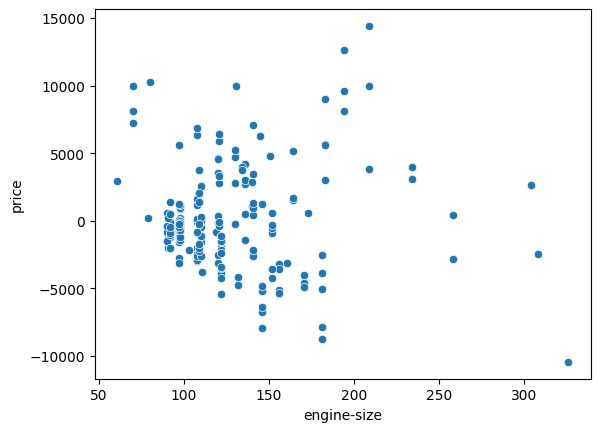

In [21]:
sns.scatterplot(x = df['engine-size'], y = es_residual)

<Axes: xlabel='curb-weight', ylabel='price'>

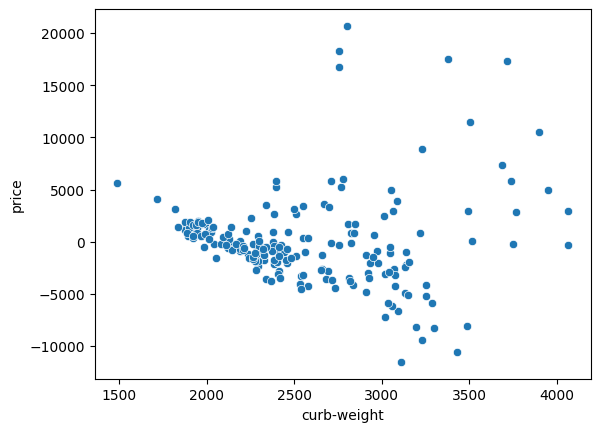

In [22]:
sns.scatterplot(x = df['curb-weight'], y = cw_residual)

<Axes: xlabel='horsepower', ylabel='price'>

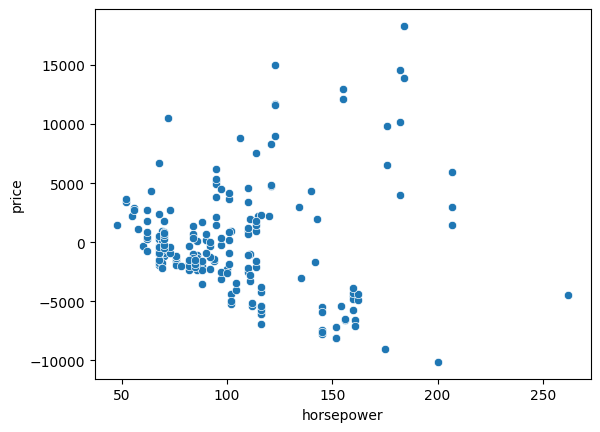

In [23]:
sns.scatterplot(x = df['horsepower'], y = h_residual)

<Axes: xlabel='width', ylabel='price'>

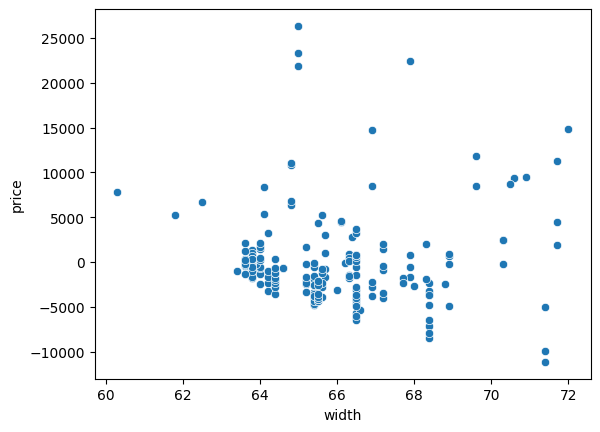

In [24]:
sns.scatterplot(x = df['width'], y = w_residual)

<Axes: xlabel='highway-mpg', ylabel='price'>

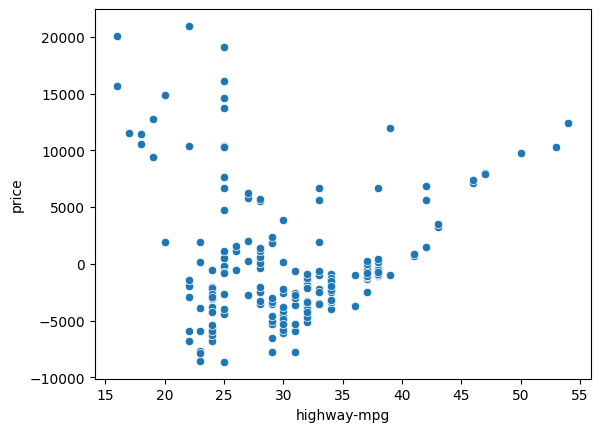

In [25]:
sns.scatterplot(x = df['highway-mpg'], y = hmpg_residual)

<Axes: xlabel='length', ylabel='price'>

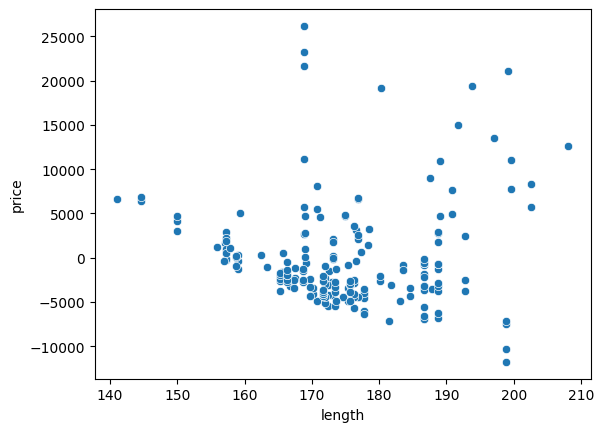

In [26]:
sns.scatterplot(x = df['length'], y = l_residual)

<Axes: xlabel='engine-size', ylabel='price'>

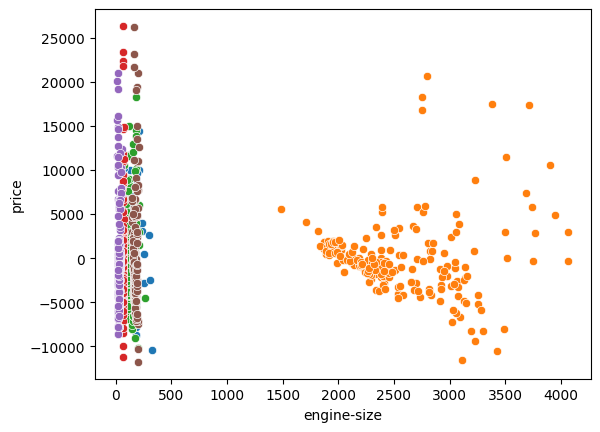

In [27]:
sns.scatterplot(x='engine-size', y = es_residual, data=df)
sns.scatterplot(x='curb-weight', y=cw_residual, data=df)
sns.scatterplot(x='horsepower', y = h_residual, data=df)
sns.scatterplot(x='width', y = w_residual, data=df)
sns.scatterplot(x='highway-mpg', y = hmpg_residual, data=df)
sns.scatterplot(x='length', y = l_residual, data=df)

<Axes: xlabel='engine-size', ylabel='price'>

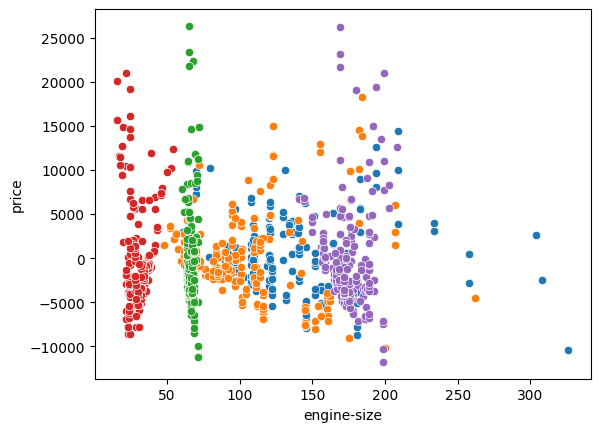

In [28]:
# without curb-weight
sns.scatterplot(x='engine-size', y = es_residual, data=df)
sns.scatterplot(x='horsepower', y = h_residual, data=df)
sns.scatterplot(x='width', y = w_residual, data=df)
sns.scatterplot(x='highway-mpg', y = hmpg_residual, data=df)
sns.scatterplot(x='length', y = l_residual, data=df)

#### Q7. Multiple linear regression model

In [31]:
Z = df[['engine-size', 'curb-weight']]
lm.fit(Z, df['price'])
print('intercept:', lm.intercept_, 'slopes:', lm.coef_, 'R^2 value:', lm.score(Z, df['price']))

intercept: -14229.717252628707 slopes: [112.30795761   5.16018181] R^2 value: 0.7924548499107636


#### Q8. Distribution Plot

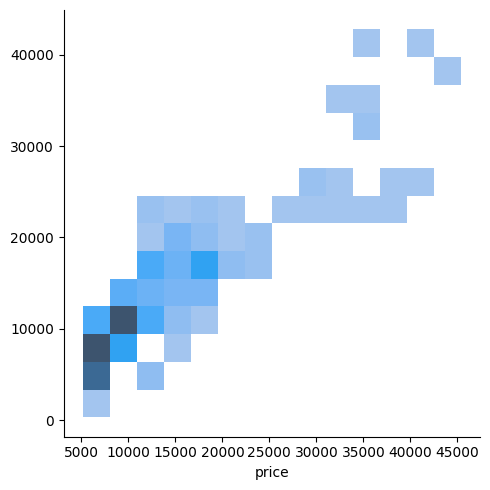

In [30]:
Y_hat = lm.predict(Z)
sns.displot(x = df['price'], y = Y_hat)

#### Q10. Parameter versus price and the best fitting quadratic line

<Axes: xlabel='width', ylabel='price'>

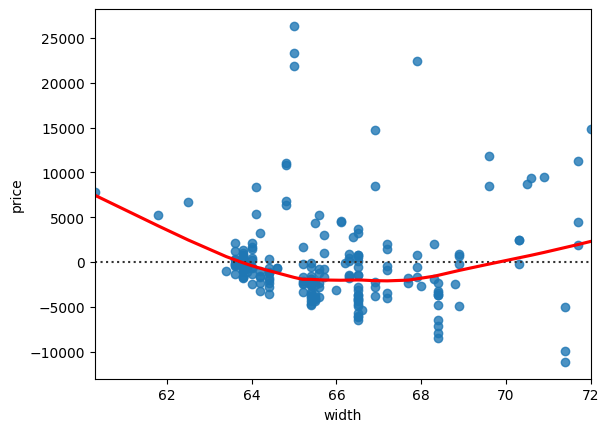

In [38]:
sns.residplot(x = df['width'], y = w_residual, lowess=True, line_kws=dict(color="r"))

<Axes: xlabel='highway-mpg', ylabel='price'>

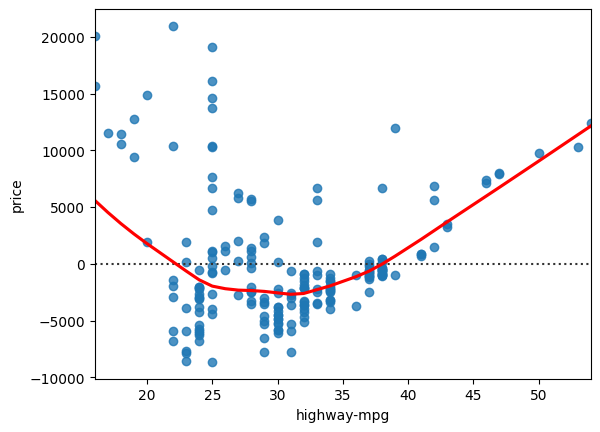

In [39]:
sns.residplot(x = df['highway-mpg'], y = hmpg_residual, lowess=True, line_kws=dict(color="r"))